count     1000.000000
mean      3288.596000
std       1526.505945
min       1793.000000
25%       3159.000000
50%       3162.000000
75%       3217.250000
max      48429.000000
Name: eg, dtype: float64


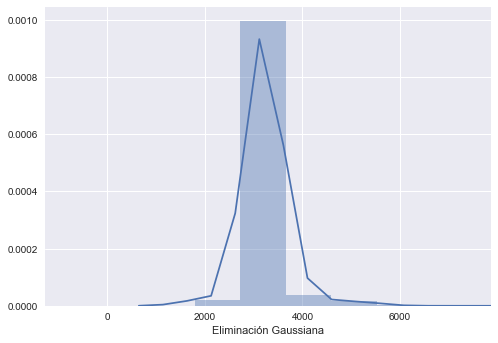

In [84]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

data = pd.read_csv('out.csv')
sns.distplot(pd.Series(data['eg'], name=u"Eliminación Gaussiana"))

mean = data.mean()
std = data.std()

print data.describe()['eg']
plt.xlim(mean['eg'] - std['eg']*3, mean['eg'] + std['eg']*3)
plt.show()

count    1000.000000
mean     2925.632000
std       280.410489
min      2841.000000
25%      2844.000000
50%      2845.000000
75%      2852.000000
max      5012.000000
Name: ch, dtype: float64


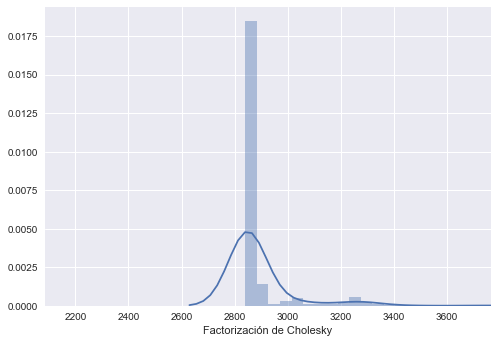

In [85]:
sns.distplot(pd.Series(data['ch'], name=u"Factorización de Cholesky"))

mean = data.mean()
std = data.std()

print data.describe()['ch']
plt.xlim(mean['ch'] - std['ch']*3, mean['ch'] + std['ch']*3)
plt.show()